## Customer Churn Prediction

#### Project overview

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement

In competitive industries like telecom, e-commerce, and SaaS, retaining customers is more cost-effective than acquiring new ones. However, identifying customers at risk of churn and understanding the reasons behind it is challenging. Companies struggle with:  
1. Predicting churn accurately due to noisy and imbalanced datasets.  
2. Extracting actionable insights from churn models for targeted retention campaigns.  
3. Automating the churn prediction process while ensuring scalability for real-time predictions.  

This project aims to address these challenges by building a machine learning solution that not only predicts churn but also explains its drivers and integrates these insights into actionable business strategies.


### 2) Data Collection
- Dataset Source - [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)

### 2.1 Import Data and Required Packages
####  Importing Pandas, polars, Numpy, Matplotlib, Seaborn and Warnings Library.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, spearmanr
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

#### Show Top 5 Records

In [40]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Shape of the dataset

In [41]:
df.shape

(7043, 21)

### 2.2 Dataset information


#### General Information:
- **Number of Rows:** 7,043<br>
- **Number of Columns:** 21<br>

#### Data Description:
1. **Customer Demographics:**<br>
   - `customerID`: Unique identifier for each customer (string).<br>
   - `gender`: Gender of the customer (`Female`, `Male`).<br>
   - `SeniorCitizen`: Indicator if the customer is a senior citizen (integer, 0 = No, 1 = Yes).<br>
   - `Partner`: Whether the customer has a partner (`Yes`, `No`).<br>
   - `Dependents`: Whether the customer has dependents (`Yes`, `No`).<br>

2. **Service Usage and Preferences:**<br>
   - `tenure`: Number of months the customer has been with the company (integer).<br>
   - `PhoneService`: If the customer has phone service (`Yes`, `No`).<br>
   - `MultipleLines`: If the customer has multiple lines (`Yes`, `No`, `No phone service`).<br>
   - `InternetService`: Type of internet service (`DSL`, `Fiber optic`, `No`).<br>
   - `OnlineSecurity`: If the customer has online security (`Yes`, `No`, `No internet service`).<br>
   - `OnlineBackup`: If the customer has online backup (`Yes`, `No`, `No internet service`).<br>
   - `DeviceProtection`: If the customer has device protection (`Yes`, `No`, `No internet service`).<br>
   - `TechSupport`: If the customer has technical support (`Yes`, `No`, `No internet service`).<br>
   - `StreamingTV`: If the customer streams TV (`Yes`, `No`, `No internet service`).<br>
   - `StreamingMovies`: If the customer streams movies (`Yes`, `No`, `No internet service`).<br>

3. **Contract and Billing Information:**<br>
   - `Contract`: Customer’s contract type (`Month-to-month`, `One year`, `Two year`).<br>
   - `PaperlessBilling`: If the customer is on paperless billing (`Yes`, `No`).<br>
   - `PaymentMethod`: Method of payment (`Electronic check`, `Mailed check`, `Bank transfer`, `Credit card`).<br>
   - `MonthlyCharges`: Amount charged to the customer monthly (float).<br>
   - `TotalCharges`: Total amount charged to the customer (float).<br>

4. **Customer Churn:**<br>
   - `Churn`: Whether the customer churned (`Yes`, `No`).

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [42]:
# Count missing values (NaN or None) in each column
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [43]:
# Check for duplicated rows and count them
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
# converting total charges to numeric data type

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### 3.4 Checking the number of unique values of each column

In [46]:
# Get the number of unique values for each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

### 3.5 Check statistics of data set

In [47]:
df.describe(include='number').round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7032.00
mean,0.16,32.37,64.76,2283.30
std,0.37,24.56,30.09,2266.77
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,401.45
50%,0.00,29.00,70.35,1397.48
75%,0.00,55.00,89.85,3794.74
max,1.00,72.00,118.75,8684.80


#### Insight

1. The dataset indicates that only **16%** of customers are seniors, with a wide range of monthly charges and total charges.
2. On average, customers have been with the company for about **32 months**, with the median tenure at **29 months**, suggesting a fairly stable customer base.
3. Total charges range significantly, with a notable difference between the 25th percentile ($ \$ 401.45$) and the 75th percentile ($ \$ 3794.74$), highlighting the variability in customer lifetime value.

In [48]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


#### Insight

1. The majority of customers  about **51%**, do not have a partner or dependents, and the top gender category is Male, with **50%** of customers being male.
2. Most customers (**90%**) have phone service, but only **48%** of them opt for multiple lines, showing a preference for single-line service.
3. Fiber optic internet service is the most popular choice (**44%**), while other services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport show low uptake, with "No" as the most common response.
4. The majority of customers are on month-to-month contracts (**55%**) and use paperless billing (**59%**).
5. Churn is relatively low, with **73%** of customers not churning, indicating potential customer retention opportunities.

### 3.7 Exploring Data

In [49]:
import sys  
import os  
# Set the functions directory 
sys.path.append(os.path.abspath('../src'))

#### [Link to the functions module](https://github.com/makina0928/Advanced-Data-Science-Project/blob/main/src/components/eda_functions.py)

In [50]:
 # Import summary functions from the components folder
 from components.eda_functions import (  
    print_feature_types,  
    print_categories,  
    calculate_key_metrics,  
    calculate_status_distribution, 
     
)

In [51]:
 # Import chart helper functions from the components folder
 from components.eda_functions import (  
    plot_pie_chart,  
    plot_kde,  
    plot_countplot,  
    count_bar_plot_with_legend, 
    plot_heatmap,
    box_plot
)

In [52]:
# Call the function to print numerical & categorical columns data types

print_feature_types(df)

We have 4 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

We have 17 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [53]:
# Call the function for categorical columns

# categorical columns
print_categories(df)

Categories in 'customerID' there are 7043 categories: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Categories in 'gender' there are 2 categories: ['Female' 'Male']
Categories in 'Partner' there are 2 categories: ['Yes' 'No']
Categories in 'Dependents' there are 2 categories: ['No' 'Yes']
Categories in 'PhoneService' there are 2 categories: ['No' 'Yes']
Categories in 'MultipleLines' there are 3 categories: ['No phone service' 'No' 'Yes']
Categories in 'InternetService' there are 3 categories: ['DSL' 'Fiber optic' 'No']
Categories in 'OnlineSecurity' there are 3 categories: ['No' 'Yes' 'No internet service']
Categories in 'OnlineBackup' there are 3 categories: ['Yes' 'No' 'No internet service']
Categories in 'DeviceProtection' there are 3 categories: ['No' 'Yes' 'No internet service']
Categories in 'TechSupport' there are 3 categories: ['No' 'Yes' 'No internet service']
Categories in 'StreamingTV' there are 3 categories: ['No' 'Yes' 'No internet se

### 3.8 Adding columns for "tenure"

In [54]:
# tenure segment function
# tenure segment functions
def map_tenure_segment(tenure):
    if tenure <= 6:
        return '1. 0 - 6 months'
    elif 7 <= tenure <= 12:
        return '2. 7 - 12 months'
    elif 13 <= tenure <= 18:
        return '3. 13 - 18 months'
    elif 19 <= tenure <= 24:
        return '4. 19 - 24 months'
    else:
        return '5. > 24 months'
    
# Apply the function to the 'tenure' column and create a new column 'tenure_segment'
df['tenure_segment'] = df['tenure'].apply(map_tenure_segment)

In [55]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_segment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1. 0 - 6 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5. > 24 months


In [56]:
# Group by 'tenure_segment' and calculate the mean of 'MonthlyCharges' and 'TotalCharges'
grouped_data = df.groupby('tenure_segment')[['MonthlyCharges', 'TotalCharges']].mean().round(2)
grouped_data = grouped_data.sort_values('tenure_segment')

# Display the sorted data
grouped_data


,MonthlyCharges,TotalCharges
tenure_segment,,
1. 0 - 6 months,54.74,143.64
2. 7 - 12 months,58.95,553.91
3. 13 - 18 months,61.24,944.71
4. 19 - 24 months,61.50,1335.27
5. > 24 months,70.61,3731.08


### Insights:
1. **Increasing TotalCharges with Tenure:** As tenure increases, the **Total Charges** steadily rise, reflecting longer customer engagement resulting in higher cumulative charges. Customers with more than 24 months tenure have significantly higher Total Charges compared to shorter-tenure groups.

2. **Gradual Rise in Monthly Charges:** There is a slight but consistent increase in **Monthly Charges** as tenure progresses, with the highest average monthly charge observed in the customers with more than 24 months tenure (**$\$ 70.61$**).

3. **Short-Tenure Customers Pay Less:** Customers with less than 6 months tenure have the lowest **Monthly Charges ($\$ 54.74$)** and **Total Charges ($\$ 143.64$)**, suggesting potential opportunities to increase revenue by upselling or improving service offerings to new customers.

### 4. Exploring Data:
#### EDA to Perform (Feature Wise numerical and graphical summaries)
-   Univariate
-   Bivariate
-   Multivariate

#### Libraries
-  Pandas for summary computations.
-  Seaborn and matplotlib for visualization plots.

#### **4.1. Overview (Executive Summary)**
   - **Key Metrics**: 
     - Average, Median and Standard deviation of Tenure, Monthly Charges, and Total Charges
     - percentage and count of Active vs. Churned Customers 
   - **Visualizations**:
     - KDE Plot: Total Customers, Churn Rate, Average Monthly Charges
     - Pie chart: Active vs. Churned Customers
---

In [57]:
# Check data types of the target attributes
df[['tenure', 'MonthlyCharges', 'TotalCharges','Churn']].dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
Churn              object
dtype: object

-  ##### Key Metrics

In [58]:
# Average, Median and Standard deviation of Tenure, Monthly Charges, and Total Charges

# Calculate key metrics
key_metrics = calculate_key_metrics(df, numeric_columns=['tenure', 'MonthlyCharges', 'TotalCharges'], handle_missing='fill')

# Convert to a DataFrame and round the values for display
key_metrics_df = pd.DataFrame(list(key_metrics.items()), columns=["Metric", "Value"])
key_metrics_df["Value"] = key_metrics_df["Value"].round(2)  # Round all values to 2 decimal places

key_metrics_df

,Metric,Value
0,Average tenure,32.37
1,Median tenure,29.00
2,Std Dev tenure,24.56
3,Average MonthlyCharges,64.76
4,Median MonthlyCharges,70.35
5,Std Dev MonthlyCharges,30.09
6,Average TotalCharges,2283.30
7,Median TotalCharges,1400.55
8,Std Dev TotalCharges,2265.00


In [59]:
# Call the function and get the results
churn_rate_df = calculate_status_distribution(df, column_name='Churn')

churn_rate_df

,Churn,Counts,Percentages
0,No,5174,73.46
1,Yes,1869,26.54


-  ##### Visualizations

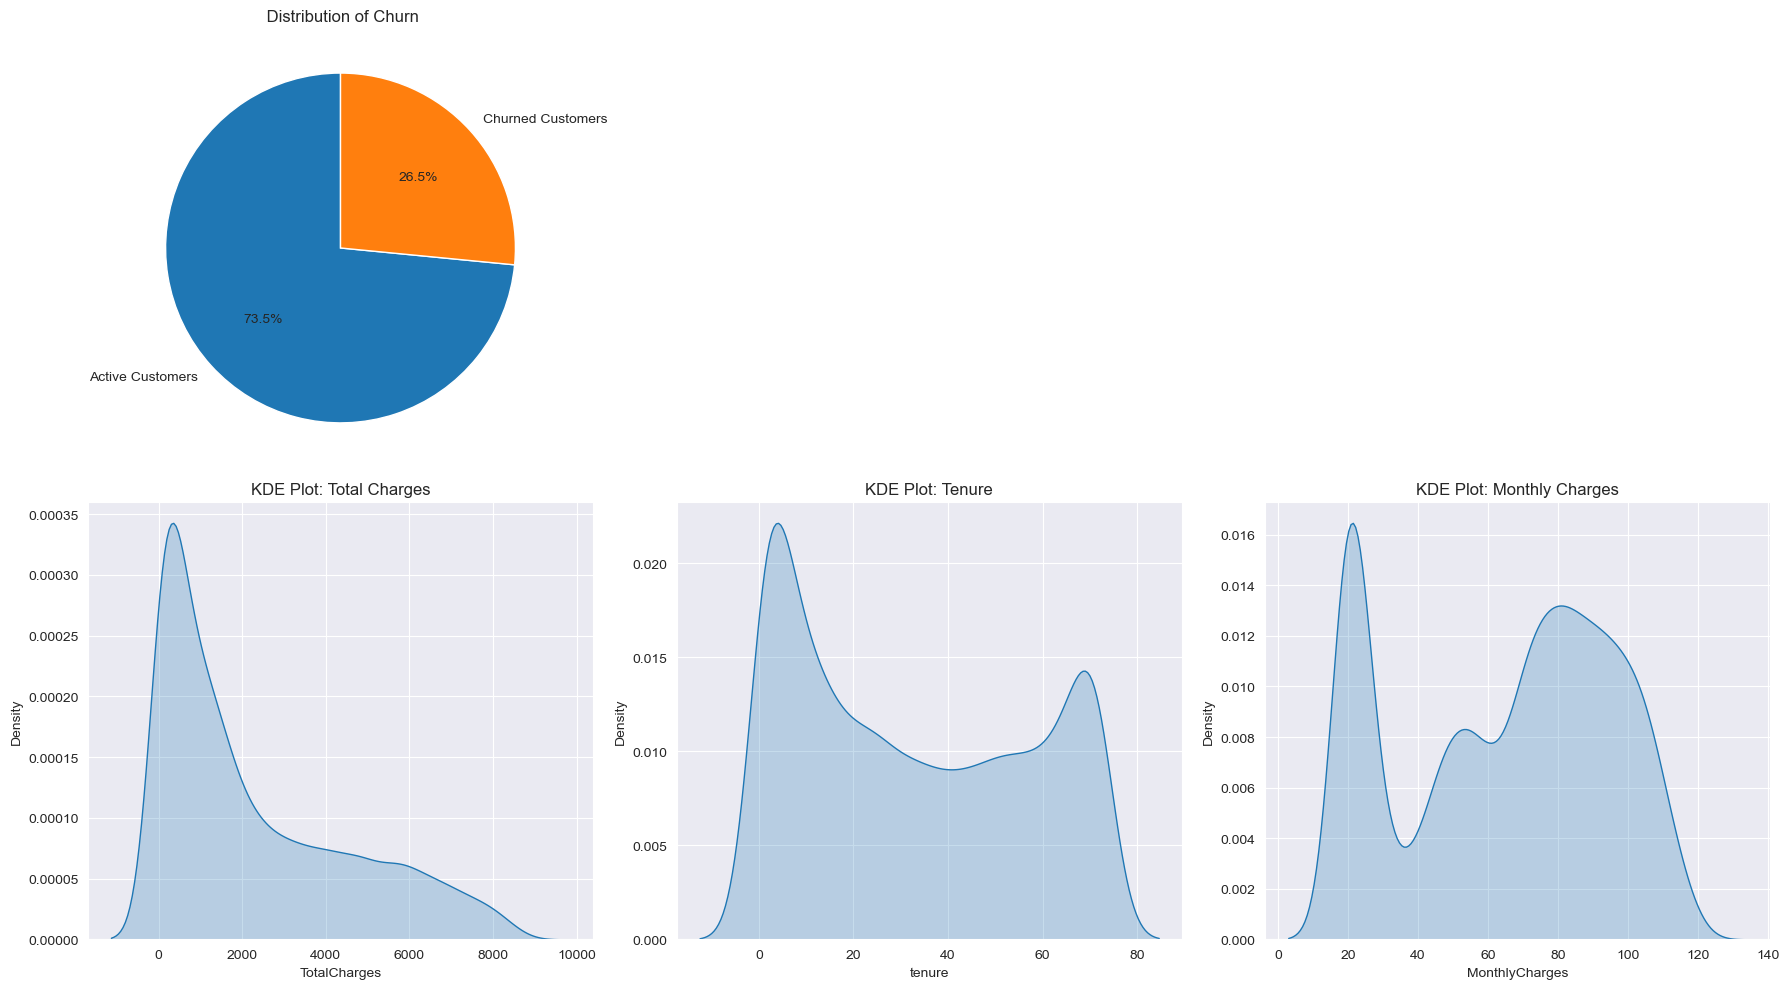

In [60]:
# Create the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
sns.set_style("darkgrid")

# Flatten the axes array for single index access
axes = axes.flatten()

# Pie chart on the first row
plot_pie_chart(df, 'Churn', labels=['Active Customers', 'Churned Customers'], colors=['#1f77b4', '#ff7f0e'], ax=axes[0])

# Hide unused subplots in the first row
axes[1].axis('off')
axes[2].axis('off')

# KDE plots on the second row
plot_kde(df, 'TotalCharges', ax=axes[3], color='#1f77b4', title='Total Charges')
plot_kde(df, 'tenure', ax=axes[4], color='#1f77b4', title='Tenure')
plot_kde(df, 'MonthlyCharges', ax=axes[5], color='#1f77b4', title='Monthly Charges')

# Adjust layout
plt.tight_layout()
plt.show()

#### **4.2. Customer Demographics Insights**
   - **Features**:
     - Gender
     - SeniorCitizen
     - Partner
     - Dependents
   - **Summaries**:
     - Percentage share of observations within Gender, SeniorCitizen, partner, and Dependents.
   - **Visualizations**:
     - Bar chart: Gender, SeniorCitizen, partner, and Dependents distribution.
     - Stacked Bar Chart: Churn by Gender, SeniorCitizen, partner, and Dependents.
     - Heatmap: Correlation between tenure, MonthlyCharges, and Churn.
---

- #### Summaries

In [61]:
# Percentage share of observations within Gender.

gender_df = calculate_status_distribution(df, column_name='gender')

# Convert the results into a DataFrame
gender_df = pd.DataFrame(gender_df)
gender_df

,gender,Counts,Percentages
0,Male,3555,50.48
1,Female,3488,49.52


In [62]:
# Percentage share of observations within SeniorCitizen.

SeniorCitizen_df = calculate_status_distribution(df, column_name='SeniorCitizen')
SeniorCitizen_df = pd.DataFrame(SeniorCitizen_df)
SeniorCitizen_df

,SeniorCitizen,Counts,Percentages
0,0,5901,83.79
1,1,1142,16.21


In [63]:
# Percentage share of observations within partner.

Partner_df = calculate_status_distribution(df, column_name='Partner')
Partner_df = pd.DataFrame(Partner_df)
Partner_df

,Partner,Counts,Percentages
0,No,3641,51.7
1,Yes,3402,48.3


In [64]:
# Percentage share of observations within Dependents.

Dependents_df = calculate_status_distribution(df, column_name='Dependents')
Dependents_df = pd.DataFrame(Dependents_df)
Dependents_df

,Dependents,Counts,Percentages
0,No,4933,70.04
1,Yes,2110,29.96


- **Visualizations**:

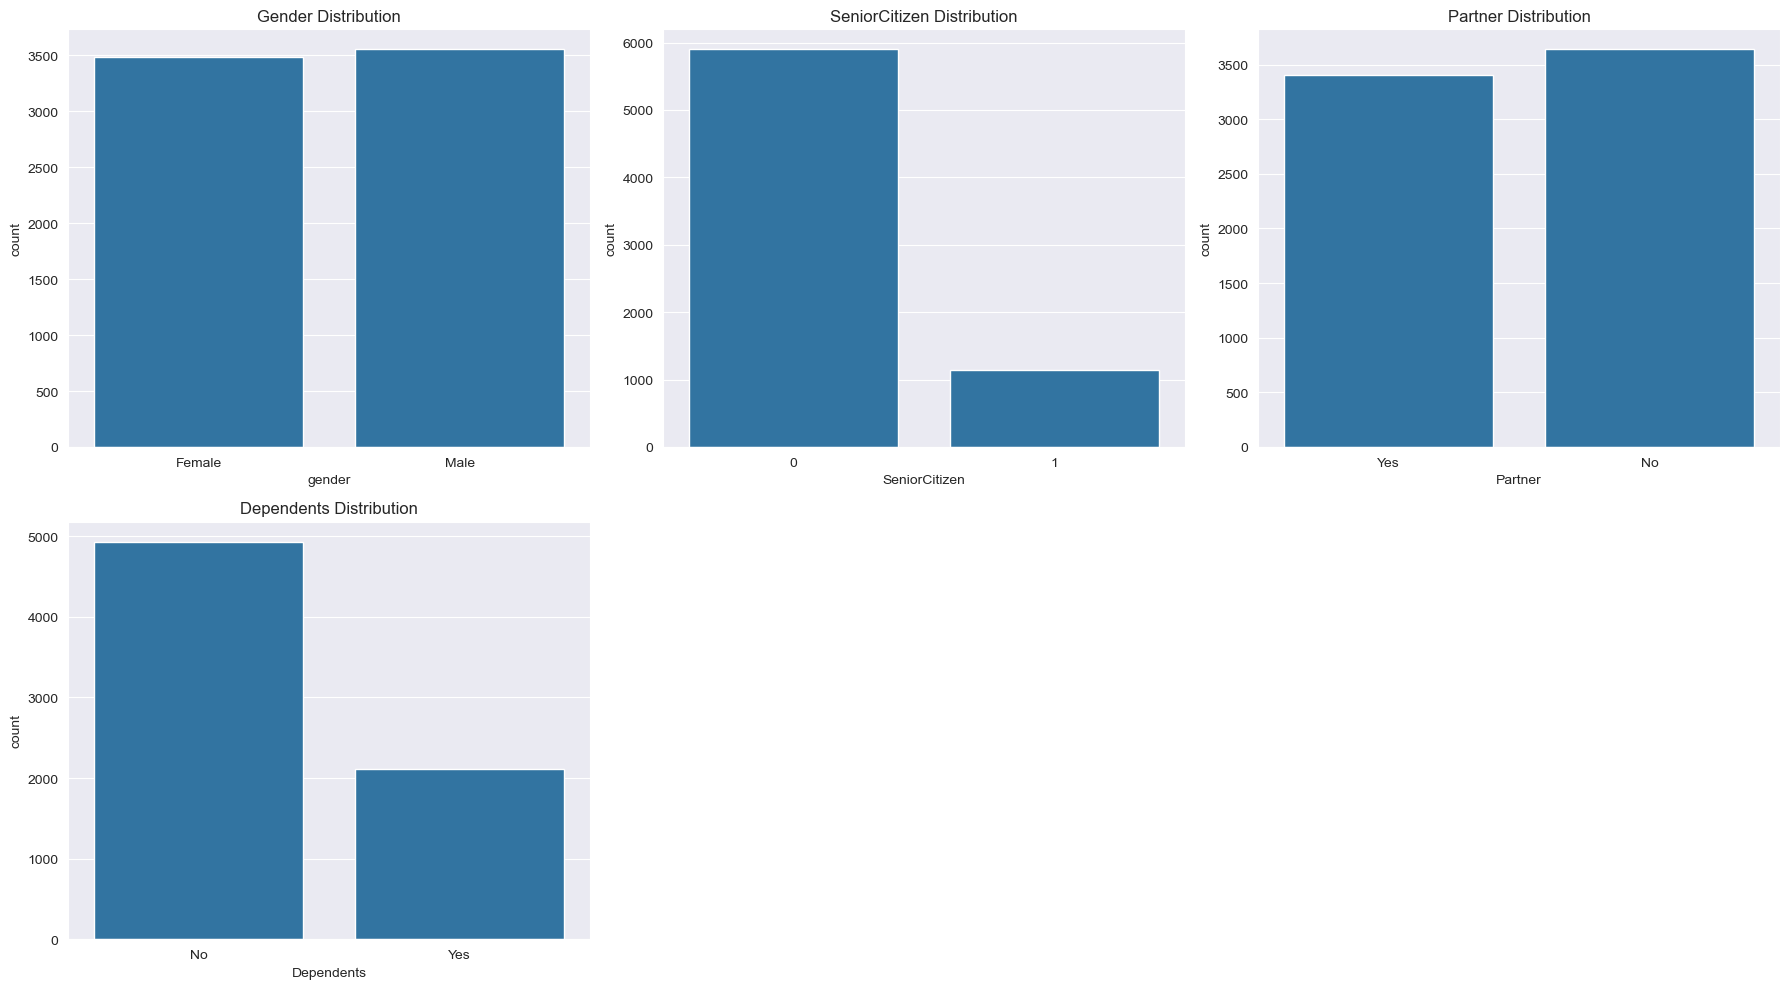

In [65]:
# Count plots for gender, senior citizen, partner and dependents

# Create the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
sns.set_style("darkgrid")

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot countplots using the helper function
plot_countplot(df, 'gender', axes[0], '#1f77b4', 'Gender Distribution')
plot_countplot(df, 'SeniorCitizen', axes[1], '#1f77b4', 'SeniorCitizen Distribution')
plot_countplot(df, 'Partner', axes[2], '#1f77b4', 'Partner Distribution')
plot_countplot(df, 'Dependents', axes[3], '#1f77b4', 'Dependents Distribution')

# Hide the unused subplots
for i in range(4, 6): 
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

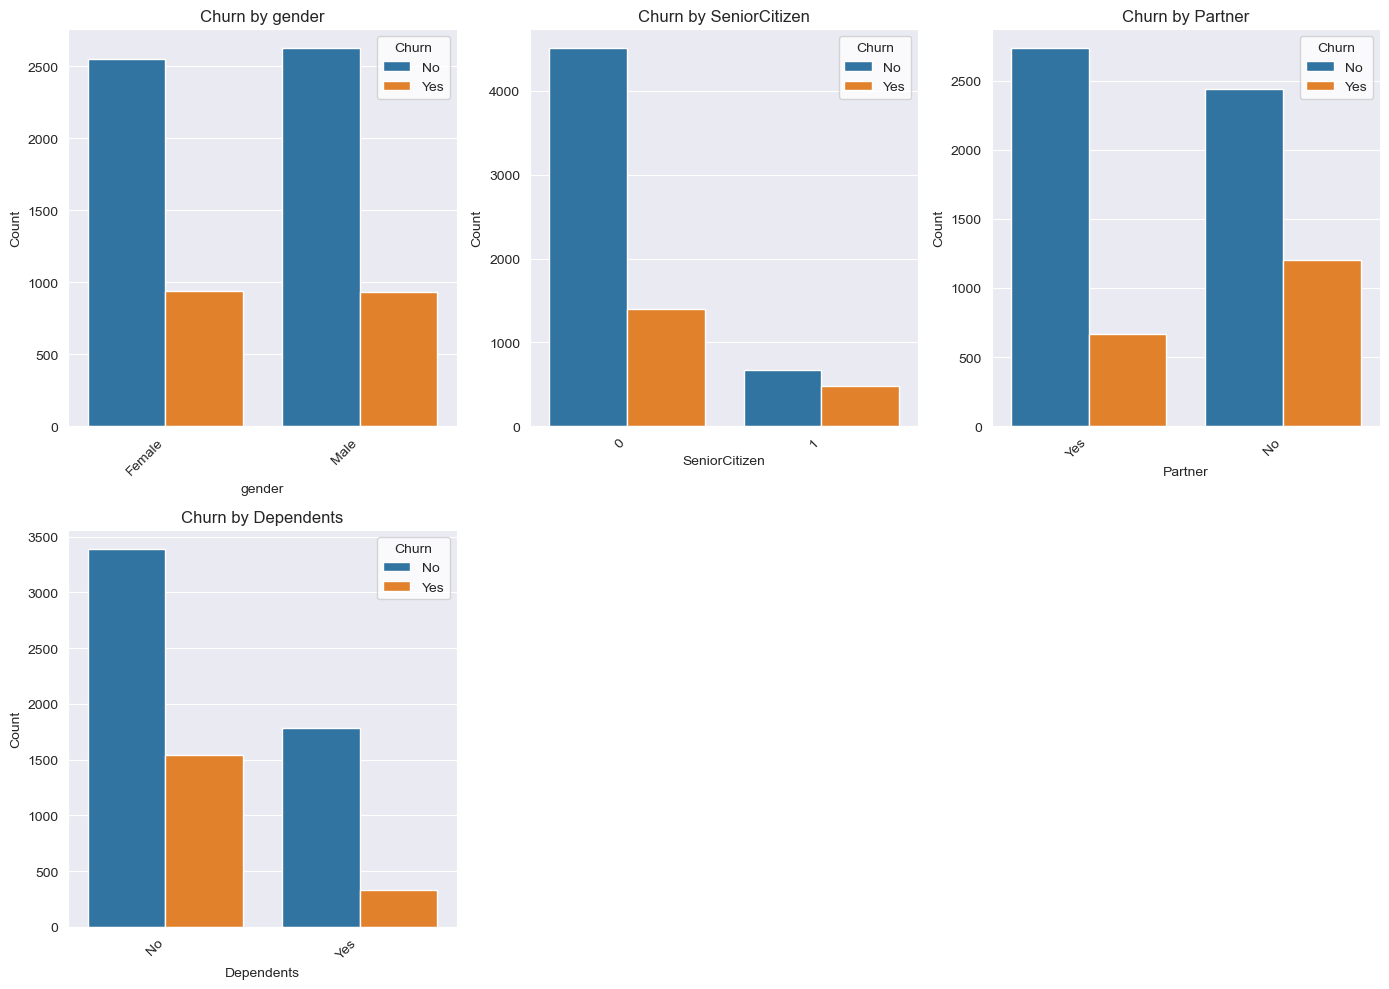

In [66]:
# Stacked Bar Chart: Churn by Gender, SeniorCitizen, partner, and Dependents.

# Create the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns
sns.set_style("whitegrid")

# Flatten axes for single index access
axes = axes.flatten()

# Specify the columns for plotting
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
target_column = 'Churn'  # The target column can be set dynamically

# Plot side-by-side bar charts for each column
for i, column in enumerate(columns):
    count_bar_plot_with_legend(df, column, target_column, axes[i])

# Hide the unused subplots
for i in range(len(columns), 6): 
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

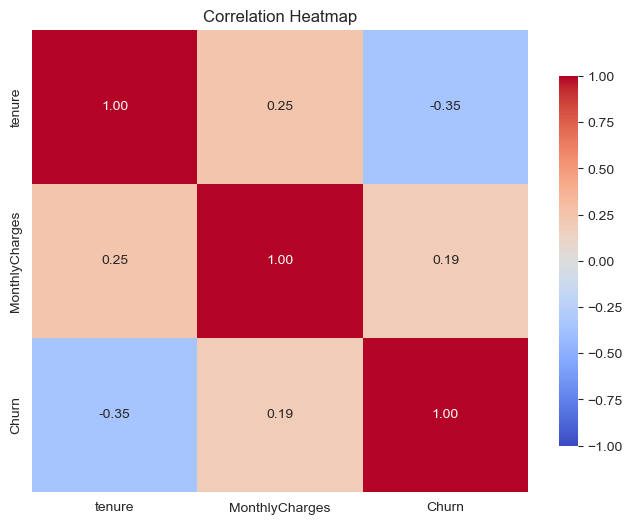

In [67]:
# Heatmap: Correlation between tenure, MonthlyCharges, and Churn.

# Convert 'Churn' to numeric for correlation (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Create the figure and subplots
fig, axes = plt.subplots(1, 1, figsize=(8, 6))  # 1 row, 1 column
sns.set_style("darkgrid")

# Plot heatmap using the helper function
plot_heatmap(df, ['tenure', 'MonthlyCharges', 'Churn'], axes)


#### **4.3. Service Usage Insights**
   - **Features**:
     - InternetService
     - StreamingTV and StreamingMovies
     - OnlineSecurity and OnlineBackup
   - **Summaries**:
     - Percentage share of observations within InternetService, StreamingTV, StreamingMovies, OnlineSecurity and OnlineBackup.
   - **Visualizations**:
     - Bar chart: InternetService, StreamingTV, StreamingMovies, OnlineSecurity and OnlineBackup distribution.
     - Stacked Bar Chart: Churn rate by InternetService, StreamingTV, StreamingMovies, OnlineSecurity and OnlineBackup.
     - Side-by-side Bars: Churn comparison of StreamingTV vs. StreamingMovies , OnlineSecurity vs. OnlineBackup.
     - Sankey Diagram: Service combinations leading to churn.
---

- **Summaries**:


In [68]:
# Percentage share of observations within InternetService, StreamingTV, StreamingMovies, OnlineSecurity and OnlineBackup.

- **Visualizations**:

In [69]:
# Bar chart: InternetService, StreamingTV, StreamingMovies, OnlineSecurity and OnlineBackup distribution.
     

In [70]:
# Stacked Bar Chart: Churn rate by InternetService, StreamingTV, StreamingMovies, OnlineSecurity and OnlineBackup.
     

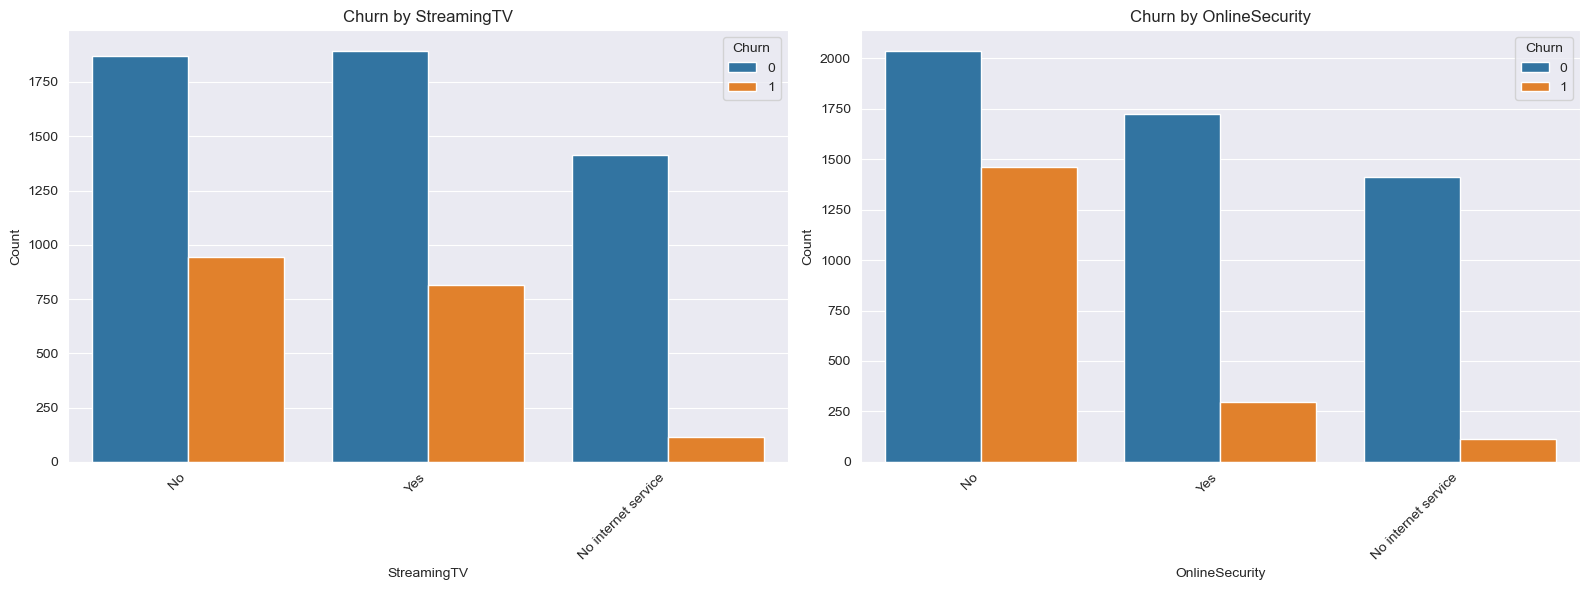

In [71]:
# Side-by-side Bars: Churn comparison of StreamingTV vs. StreamingMovies , OnlineSecurity vs. OnlineBackup.

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Flatten axes for single index access
axes = axes.flatten()

# Specify the columns for plotting
columns = ['StreamingTV', 'OnlineSecurity']
target_column = 'Churn'  # The target column can be set dynamically

# Plot side-by-side bar charts for each column
for i, column in enumerate(columns):
    count_bar_plot_with_legend(df, column, target_column, axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

#### **4.4. Contract and Billing Insights**
   - **Features**:
     - Contract Type
     - PaperlessBilling
     - PaymentMethod
     - MonthlyCharges
     - TotalCharges
   - **Summaries**:
     - Percentage share of within Contract Type, PaperlessBilling and PaymentMethod observations
     - Average MonthlyCharges and TotalCharges
   - **Visualizations**:
     - Line Chart: Churn rate trend by Contract type over time.
     - Pie Chart: Churn distribution by PaymentMethod.
     - Boxplot: MonthlyCharges and TotalCharges by Churn status.
---

- **Summaries**:
     

In [72]:
# Percentage share of within Contract Type, PaperlessBilling and PaymentMethod observations
     

In [73]:
# Average MonthlyCharges and TotalCharges


- **Visualizations**:

Text(0, 0.5, 'Percentage (%)')

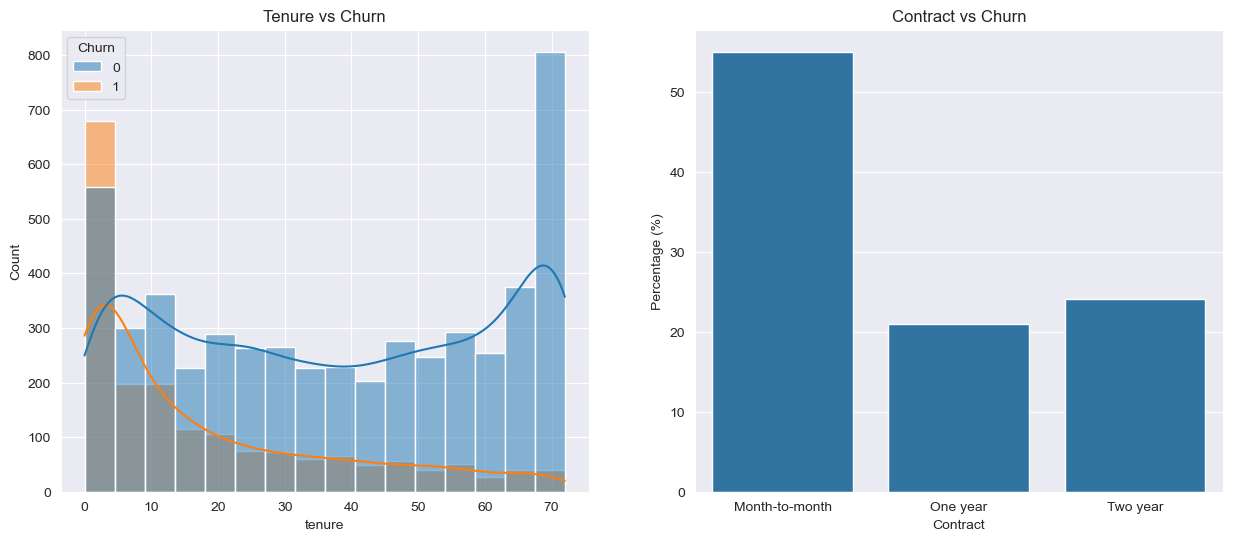

In [74]:
# Histogram: Churn rate trend by Contract type over time.

# Plotting barplots for 'tenure' and 'Contract' separately
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Plot for 'tenure'
sns.histplot(x='tenure', data=df, kde=True, hue='Churn', ax=axes[0])
axes[0].set_title('Tenure vs Churn')

# Plot for 'Contract'
sns.barplot(x='Contract', y='Churn', data=df, ax=axes[1], ci=None, estimator=lambda x: len(x) / len(df) * 100)
axes[1].set_title('Contract vs Churn')
axes[1].set_ylabel('Percentage (%)')

In [75]:
# Pie Chart: Churn distribution by PaymentMethod.
     

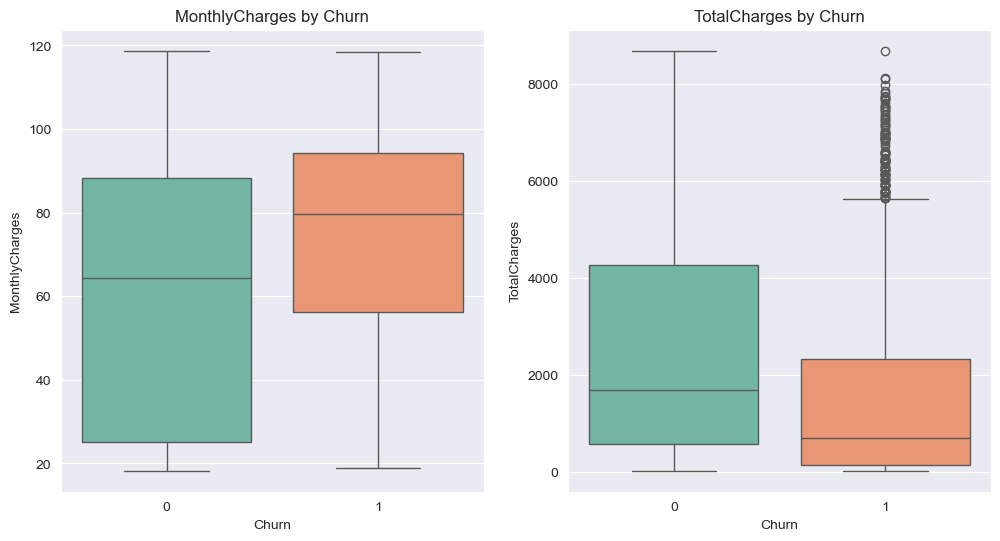

In [76]:
# Boxplot: MonthlyCharges and TotalCharges by Churn status.

value_columns = ['MonthlyCharges', 'TotalCharges']  # Columns for values to be plotted
category_column = 'Churn'  # Column to group by (e.g., churn status)

# Assuming 'df' is the DataFrame containing your data
box_plot(df, value_columns, category_column)
